<a href="https://www.kaggle.com/code/prasadposture121/iris-dataset-classification?scriptVersionId=107578287" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

### Prasad Rajesh Posture  
**Batch**: July 2022  
Artificial Intelligence  

**Task :** Classify the data using various machine learning algorithms and find the algorithm which provies highest accuracy rate.

In [1]:
#checking versions
import sys
print('Python : {}'.format(sys.version))
import scipy
print('Scipy : {}'.format(scipy.__version__))
import numpy
print('Numpy : {}'.format(numpy.__version__))
import seaborn
print('Seaborn : {}'.format(seaborn.__version__))
import numpy
import matplotlib
print('Matplotlib : {}'.format(matplotlib.__version__))
import pandas
print('Pandas : {}'.format(pandas.__version__))
import sklearn
print('Sklearn : {}'.format(sklearn.__version__))

Python : 3.7.12 | packaged by conda-forge | (default, Oct 26 2021, 06:08:53) 
[GCC 9.4.0]
Scipy : 1.7.3
Numpy : 1.21.6
Seaborn : 0.11.2
Matplotlib : 3.5.2
Pandas : 1.3.5
Sklearn : 1.0.2


In [2]:
#import neccessary libraries / methods from the libraries
import pandas
import numpy as np
import seaborn as sns
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
import seaborn as sns

#methods for modeling and predictions
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.ensemble import VotingClassifier

#import required models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [3]:
#Loading the data directly using url
url='../input/iris/Iris.csv'
dataset=read_csv(url)
#dropping the id from the dataframe
dataset.drop('Id', axis=1, inplace=True)
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#Dimensions of the data
dataset.shape

(150, 5)

In [5]:
#Statistical Summmary
dataset.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
#Class Distribution
dataset.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

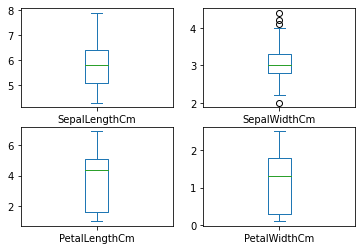

In [7]:
#Univariate plots: Box and Whisker Plots
dataset.plot(kind='box',subplots=True,layout=(2,2),sharex=False,sharey=False)
pyplot.show();

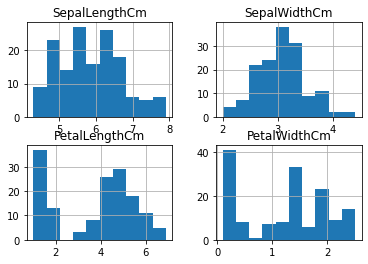

In [8]:
#Histogram of the variable
dataset.hist()
pyplot.show();

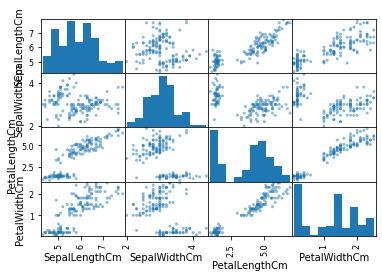

In [9]:
#Multivariate plots
scatter_matrix(dataset)
pyplot.show();

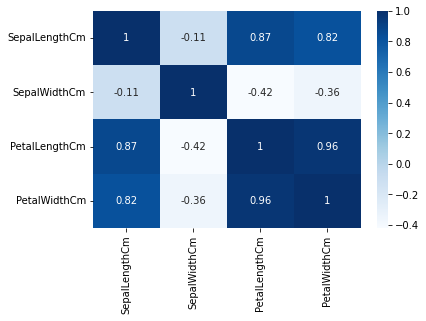

In [10]:
sns.heatmap(dataset.corr(), annot=True, cmap='Blues');

You can see that there is a great correlation between `PetalWidthCm` & `PetalLengthCm` also slightly better correlation between `PetalLengthCm` & `SepalLengthCm` and `PetalWidthCm` & `SepalLengthCm`. We see how different `Species` of flower are distributed over these attributes with significant correlation using scatterplot.

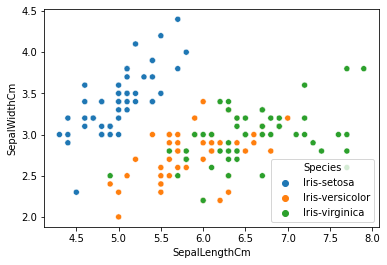

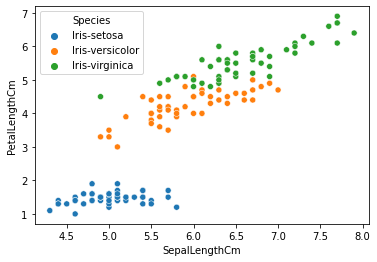

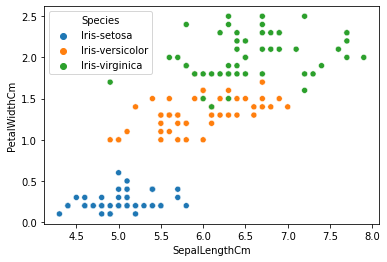

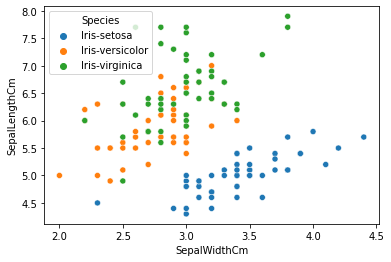

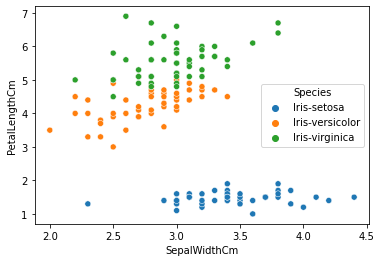

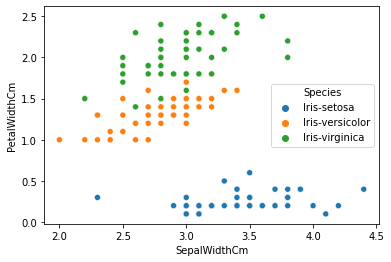

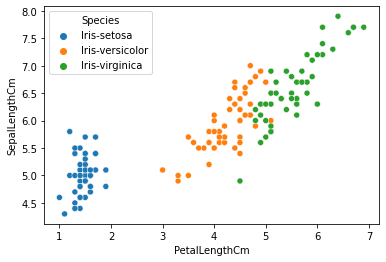

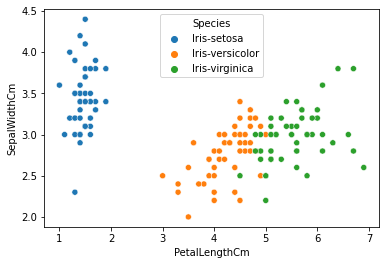

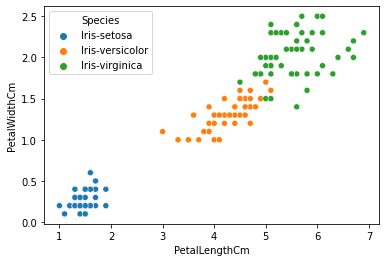

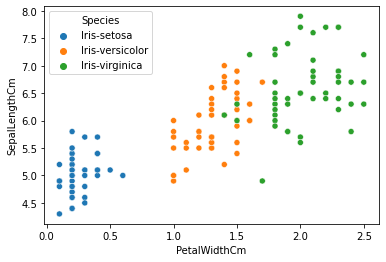

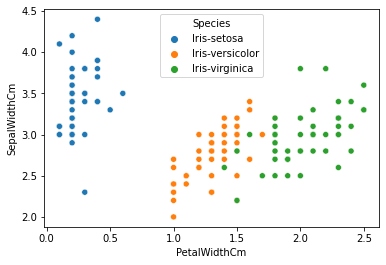

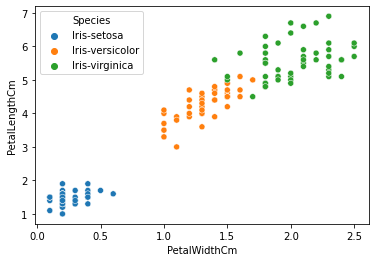

In [11]:
attributes=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
for i in attributes:
    for j in attributes:
        if i!=j:
            sns.scatterplot(data=dataset, x=i, y=j, hue='Species')
            pyplot.show();
    

As you can see from the scatterplot the relationship between `PetalWidthCm` & `PetalLengthCm` is very significant for classification of the Iris dataset.

In [12]:
#Creating validation dataset
#splitting dataset 
array=dataset.values
X=array[:,0:4]
y=array[:,4]
X_train, X_validation,Y_train,Y_validation=train_test_split(X,y,test_size=0.2,random_state=1)

In [13]:
# Logistic Regression
# LInear Discriminant Analysis
# K-Nearest Neighbors
# Classification and Regression Trees
# Gaussian Naive Bayes
# Support Vector Machine
# Building models
models=[]
models.append(('LR',LogisticRegression(solver='liblinear',multi_class='ovr')))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('DTC',DecisionTreeClassifier()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC(gamma='auto')))

In [14]:
#Evaluae the created models
results=[]
names=[]
for name,model in models:
    kfold=StratifiedKFold(n_splits=10)#random_state=1
    cv_results=cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' %(name,cv_results.mean(),cv_results.std()))

LR: 0.950000 (0.055277)
LDA: 0.975000 (0.038188)
DTC: 0.941667 (0.075000)
KNN: 0.958333 (0.041667)
NB: 0.950000 (0.055277)
SVM: 0.983333 (0.033333)


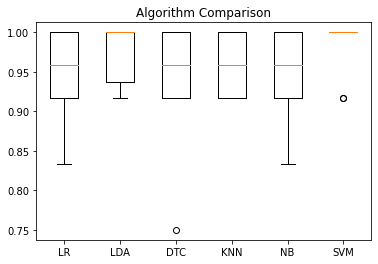

In [15]:
#Compare our models
pyplot.boxplot(results,labels=names)
pyplot.title("Algorithm Comparison")
pyplot.show()

In [16]:
#Make Predictions on SVM
model=SVC(gamma='auto')
model.fit(X_train,Y_train)
predictions=model.predict(X_validation)

In [17]:
dataset.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Accuracy : 0.9666666666666667
Classfication Report :
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



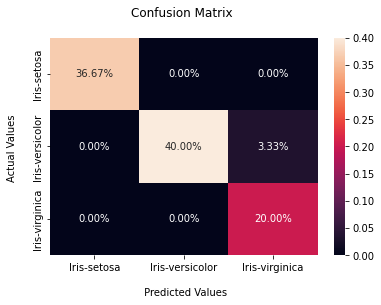

In [18]:
#Evalutate our predictions
print('Accuracy :',accuracy_score(Y_validation,predictions))
print('Classfication Report :\n',classification_report(Y_validation,predictions))
cf=confusion_matrix(Y_validation,predictions)
L=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
ax=sns.heatmap(cf/np.sum(cf), annot=True, xticklabels=L, yticklabels=L, fmt='.2%')
ax.set(title='Confusion Matrix \n',xlabel='\n Predicted Values', ylabel='Actual Values \n');

The End